# Exercises 03

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

## 03.1 - Estimating european option prices

#### <span style="color:green"> Brief theoretical introduction </span>

The following graphs show the simulation of the estimation of european option prices. In this kind of option an agreement between two parties is made in which one side of the party established a point in time where he grants the right to the other party to either buy (ie call option) or sell (ie put option) to him an underlying at a price fixed prior. The other party can therefore decide at that point in time if it is convenient for him to buy or sell his underlying. 

This right needs to have a price though or the first party is always losing. The pricing is done by calculating the mean of the expected profit.

#### <span style="color:green"> Analytic solution to the problem. </span>

In [5]:
#calcolo il valore analitico

import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


#### <span style="color:green"> Simulation using Monte Carlo. </span>

 The first picture is done by evaluating the price only at time T; the second one by evaluating the price dividing the interval [0, T] into 100 subintervals.

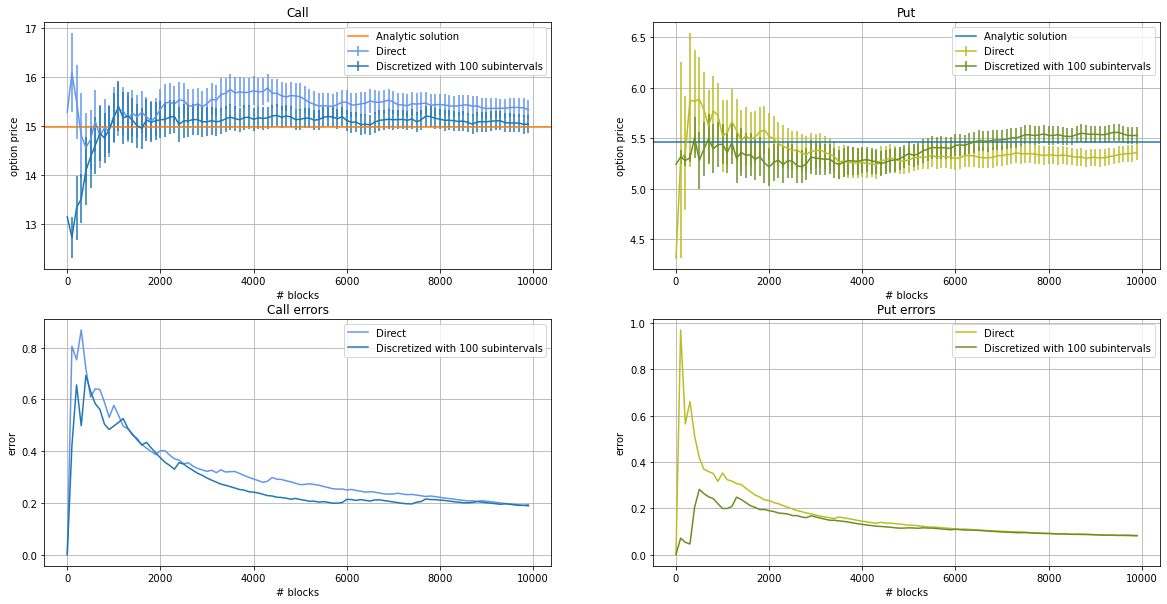

In [30]:
path = "Direct.out"

N, M = np.loadtxt(path, usecols=(0, 1), delimiter=' ', unpack='true', max_rows=1)
C, err_c, P, err_p= np.loadtxt(path, usecols=(0, 2, 1, 3), delimiter=' ', unpack='true', skiprows=1)

x = np.arange(N)
L=int(M/N)
x*=L

path = "Discretized.out"
t = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', max_rows=1)
C1, err_c1, P1, err_p1= np.loadtxt(path, usecols=(0, 2, 1, 3), delimiter=' ', unpack='true', skiprows=1)

fig, ( (ax1, ax2),(ax3, ax4))=plt.subplots(2,2,  figsize=(20, 10))

ax1.errorbar(x,C,yerr=err_c, label = 'Direct', c="cornflowerblue")
ax1.errorbar(x,C1,yerr=err_c1, label = "Discretized with " + str(int(t)) + " subintervals")
ax1.axhline(y=call, c="tab:orange", label = "Analytic solution")

ax1.set_xlabel('# blocks')
ax1.set_ylabel('option price')
ax1.grid("True")
ax1.set_title("Call", size = 12)
ax1.legend()

ax2.errorbar(x,P,yerr=err_p, label = 'Direct', c="tab:olive")
ax2.errorbar(x,P1,yerr=err_p1, label = "Discretized with " + str(int(t)) + " subintervals", c="olivedrab")
ax2.axhline(y=put, c="tab:blue", label = "Analytic solution")

ax2.set_xlabel('# blocks')
ax2.set_ylabel('option price')
ax2.grid("True")
ax2.set_title("Put" , size = 12)
ax2.legend()

ax3.plot(x,err_c, label = 'Direct', c="cornflowerblue")
ax3.plot(x,err_c1, label = "Discretized with " + str(int(t)) + " subintervals", c="tab:blue")
ax3.set_xlabel('# blocks')
ax3.set_ylabel('error')
ax3.grid("True")
ax3.set_title("Call errors" , size = 12)
ax3.legend()

ax4.plot(x,err_p, label = 'Direct', c="tab:olive")
ax4.plot(x,err_p1, label = "Discretized with " + str(int(t)) + " subintervals", c="olivedrab")
ax4.set_xlabel('# blocks')
ax4.set_ylabel('error')
ax4.grid("True")
ax4.set_title("Put errors" , size = 12)
ax4.legend()

plt.show()

In both cases the values of the estimated price options for the call and for the put are consisted with the analytical solutions (within 2$\sigma$). But the latter has smaller errors and converges faster. It is indeed a more realistically representation of the expected profit.